In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC 

<class 'numpy.ndarray'> [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

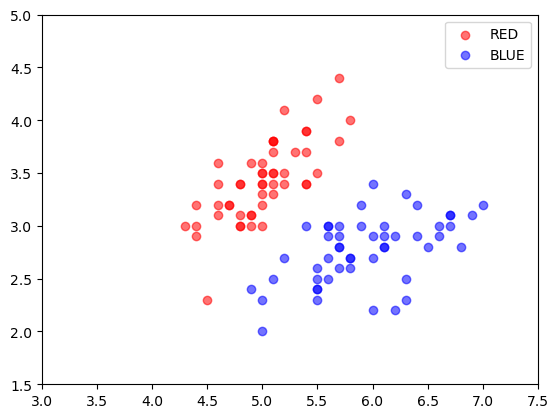

In [5]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(type(X),X)
print(type(y),y)
#这里我们写二维的SVM，所以接下来只选取两组数据
X = X[y<2,:2] 
y = y[y<2]
print(type(X),X)
print(type(y),y)

plt.scatter(X[y==0,0], X[y==0,1], color='red', alpha=0.55, label='RED')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', alpha=0.55, label='BLUE')
plt.xlim(3.0, 7.5)
plt.ylim(1.5, 5.0)
plt.legend()
plt.show()

In [ ]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

In [ ]:
plt.scatter(X[y==0,0], X[y==0,1], color='red', alpha=0.55, label='RED')
plt.scatter(X[y==1,0], X[y==1,1], color='blue', alpha=0.55, label='BLUE')
plt.xlim(3.0, 7.5)
plt.ylim(1.5, 5.0)
plt.legend()
plt.show()
#绘制出训练的生成向量机